# Decision Trees

Decision Trees are capable of performe classification and regression tasks and even multiotput tasks.

In [56]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:,2:] #petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X,y)

DecisionTreeClassifier(max_depth=2)

Decision trees can be visualized by using the export_grapviz() from the ```Scikit-learn``` package

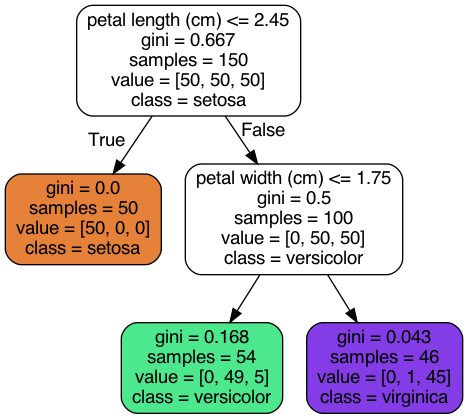

In [57]:
from sklearn.tree import export_graphviz
from IPython.display import display, Image
export_graphviz(
    tree_clf, 
    out_file = 'iris_tree.dot', 
    feature_names = iris.feature_names[2:],
    class_names = iris.target_names,
    rounded = True,
    filled = True
)

display(Image(filename='iris_tree.png'))

## Making predictions

One of the many qualities of Decision Trees is that they require very little data preparation. In fact, they don't need feature scaling or centering

A node's ```sample``` attribute conts how many instances it applies to:
> First node of our decision tree applies to all instances (150), but the secont just to 100

A node's ```value```atribute tells you how many instances of each class this node applies to
>```petal length (cm) <= 2.45 | value [50,50,50] ```
>```petal with (cm) <= 1.75 | value [0,50,50] ```

A node's ```gini``` attribute measures its *impurity*. If a nodes applies only to one class its ```gini```imputity is **0**
> Eq. Gini impurity\
>$\displaystyle G_i = 1 -\sum^{m}_{k =1} p_{i,k}^2$\
>$\displaystyle p_{i,k}$ is the ratio of class $k$ among the the training instances in the $i^{th}$ node

### Estimating Class Probabilities

In [58]:
#suppose a flower whose petals are 5 cm ling and 1.5 cm wide
tree_clf.predict_proba([[5,1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [59]:
#suppose a flower whose petals are 5 cm ling and 1.5 cm wide
tree_clf.predict([[5,1.5]])

array([1])

## The CART algorithm 

Scikit-Learn uses the *Classification and Regression Tree* (CRAT) algorithm to train Decison Trees.

The algorith works by splitting the training set into two sub sets using a single feature $k$ and a threshold $t_k$ .

How does it choose $k$  and $t$ ?

It searches for the pair ($k$ , $t_k$) that produces the purest subset (weighted by their size).

> Equation for the *CART* cost fuction for classification\
> $\displaystyle J(k, t_k)  = \frac{m_{left}}{m}G_{left} + \frac{m_{right}}{m}G_{right}$

Where:
- $G_{left \, / \, right}$ measures the purtity of the left/right subset
- $m_{left \, / \, right}$ is the number of instances in the left/right subset

Once the *CART* algorithm has split the raining set into two, it splits the subsets using the same logic ultil the Tree depth specified( ```max_depth``` is the corresponding hyperparameter)

Other possible Hyperparameters:
- ```max_depth```
- ```min_sample_split```
- ```min_smaple_leaf```
- ```min_weigth_fraction_leaf```
- ```max_leaf_nodes```


### Gini Impurity and Entropy

 **Gini Impurity** is the default ```criterion``` hyperparameter in ```Scikit-learn```. However, this can be changed to "entropy".
 
 Entropy is a thermodinamic concept that measures the molecular disorder, however, it is also spread in other fields, such as *Shannon's information entropy*, where it measures the average information of a message.
 
 Entropy is zero when all message are identical. In ML entropy is used as impurity measure. A set's entropy is zero when it contains intances of only one class. 
 
 > Eq. Entropy\
 >$\displaystyle H_i = \sum^{m}_{k_i=1} p_{i,k} log_2(p_{i,k})$
 
 >Ej. In the previos example the depth-2 node has an entroypy equal to\
 >$\displaystyle H_2 = -\frac{49}{54}·log_2(\frac{49}{54}) -\frac{5}{54}·log_2(\frac{5}{54}) \approx 0.445$ 
 

### Regularization Hyperparameters

Decision trees are *non-parametric* models becuse the number of parameters is not determined prior to training.

To avoid overfitting the training data, it is needed to restrict the Decision Tree's freedom durign training. This is called regularization. The most usual is the ```max_depth``` hyperparameter

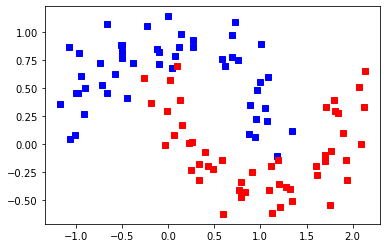

In [60]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

X, y = make_moons(n_samples=100, noise = 0.15)

plt.plot(X[:,0][y==0], X[:, 1][y==0], 'bs')
plt.plot(X[:,0][y==1], X[:, 1][y==1], 'rs')
plt.show()


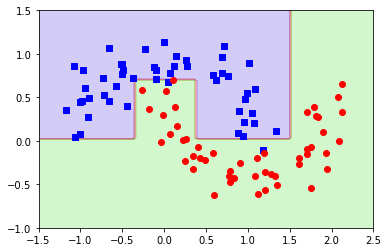

In [61]:
import numpy as np

tree_clf_2 = DecisionTreeClassifier(min_samples_leaf = 4)
cfl_1 = tree_clf_2.fit(X,y)

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    #y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    #plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)
    

plot_predictions(cfl_1, [-1.5, 2.5, -1, 1.5])
plt.plot(X[:,0][y==0], X[:, 1][y==0], 'bs')
plt.plot(X[:,0][y==1], X[:, 1][y==1], 'ro')    
plt.show()

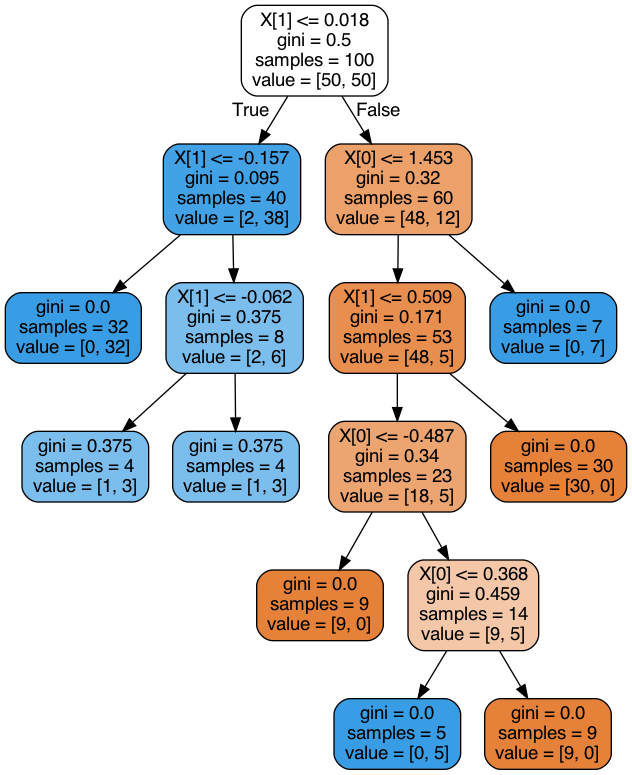

In [62]:
export_graphviz(
    tree_clf_2, 
    out_file = 'moon_data.dot', 
    rounded = True,
    filled = True
)
display(Image(filename='moon_data.png'))

## Regression 

Decision Trees are also capable of performing regression tasks.

We are going to build a noisy quadratic data set (gaussian distributed)

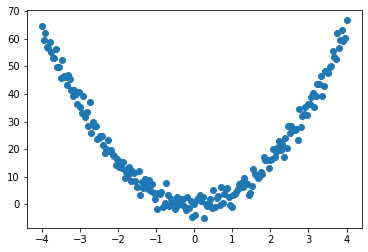

In [79]:
X0 = np.linspace(-4,4,200)
y0 = 4*X0**2 + 2.5*np.random.randn(1,200)
X = X0.reshape(-1,1)
y = y0.reshape(-1,1)

plt.scatter(X, y)

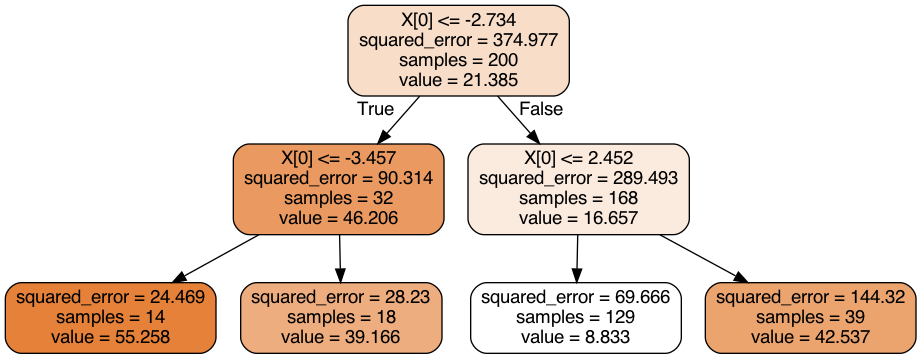

In [81]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X,y)

export_graphviz(
    tree_reg, 
    out_file = 'quadratic_data.dot', 
    rounded = True,
    filled = True
)
display(Image(filename='quadratic_data.png'))

The tree looks very similar to te classification tree built earlier. The main difference is that instead of predicting a class in each node it predicts a value. 

In this case the predicted value of a node is the average target value of the training instances asociated with that leaf.

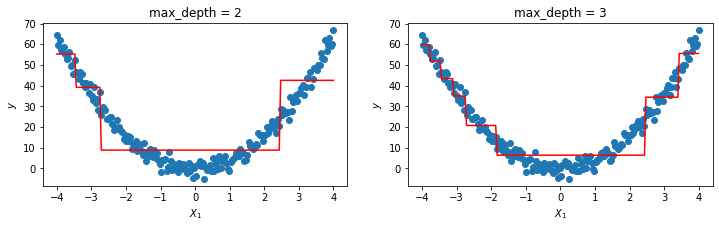

In [82]:
y_pred = tree_reg.predict(X)

tree_reg_2 = DecisionTreeRegressor(max_depth=2)
tree_reg_3 = DecisionTreeRegressor(max_depth=3)
tree_reg_2.fit(X,y)
tree_reg_3.fit(X,y)


y_pred_2 = tree_reg_2.predict(X)
y_pred_3 = tree_reg_3.predict(X)

plt.figure(figsize=(12,3))
plt.subplot(121)
plt.scatter(X,y,)
plt.plot(X, y_pred_2, 'r-')
plt.xlabel("$X_1$")
plt.ylabel("$y$")
plt.title('max_depth = 2')

plt.subplot(122)
plt.scatter(X,y,)
plt.plot(X, y_pred_3, 'r-')
plt.xlabel("$X_1$")
plt.ylabel("$y$")
plt.title('max_depth = 3')

plt.show()


The *CART* algorithm works mostly the same way as earlier, except that instead of trying to split the set in a way that minimizes the impurity, it now tries to split the training set in a way tat minimizes the MSE.

> Eq. CART cost function for regression \
> $\displaystyle J(k,t_k) = \frac{m_{left}}{m}·MSE_{left} + \frac{m{right}}{m}·MSE_{right}$

Where:
- $\displaystyle MSE_{node} = \sum_{i \,\in \, node} (\hat{y}_{node} - y^{(i)})^2$
- $\displaystyle \hat{y} = \frac{1}{m_{node}} \sum_{i \,\in \, node} y^{(i)}$

Just like for classification tasks, Decision Trees are prone to verfitting when dealing with regression tasks.

- Whithout regularization we get the model on the left. 

- Setting ```min_samples_leaf = 10``` is a much more reasonable model

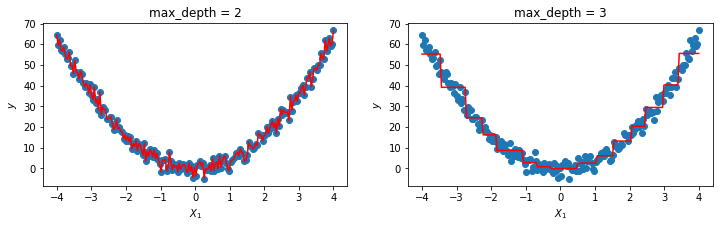

In [83]:
tree_reg_no_regularization = DecisionTreeRegressor()
tree_reg_min_s_10 = DecisionTreeRegressor(min_samples_leaf = 10)

tree_reg_no_regularization.fit(X,y)
tree_reg_min_s_10.fit(X,y)


y_pred_no_regularization = tree_reg_no_regularization.predict(X)
y_pred_min_s_10 = tree_reg_min_s_10.predict(X)

plt.figure(figsize=(12,3))
plt.subplot(121)
plt.scatter(X,y,)
plt.plot(X, y_pred_no_regularization, 'r-')
plt.xlabel("$X_1$")
plt.ylabel("$y$")
plt.title('max_depth = 2')

plt.subplot(122)
plt.scatter(X,y,)
plt.plot(X, y_pred_min_s_10, 'r-')
plt.xlabel("$X_1$")
plt.ylabel("$y$")
plt.title('max_depth = 3')

plt.show()